### Evgeniya Shevchuk

## 1. Loading data

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix

In [2]:
education=pd.read_csv('ed.csv', delimiter = ";", index_col="key").values
n=306

For this task the dataset of the main characteristics of education in the USA by states from 2011 to 2016 was used. 

##### Features:
All of the features are numerical.
key: A combination of the year and state name.
enroll: The U.S. Census Bureau's count for students in the state.
revenue: The total amount of revenue for the state.
expenditure: The total expenditure for the state.
grades_8: Number of students in eighth grade.
grades_12: Number of students in twelfth grade.
math_8: The state's average score for eight graders taking the NAEP math exam.
read_8: The state's average score for eight graders taking the NAEP reading exam.

##### Number of entities:
There are 306 entities in the table: for 50 states and District of Columbia during 6 years. 

##### Source address: 
https://www.kaggle.com/noriuk/us-education-datasets-unification-project

##### Examples of problems:
It is interesting to analyze is there any dependency between expenditure and revenue of the educational system in different states and the average marks? Does funding give any impact on the general academic performance?


#### Preparation of the data

For this task I chose three variables. The first one "Enroll" represents the total amount of the students in each state by the end of the year. The second variable is "Revenue" and stands for how much the state got from the education in schools. The third variable describes the average mark for reading test in the 8th form. All of these three valuables stands for the main characteristics of education and may show system of which state is the most efficient. Other variables has some kind of relations with those that I have chosen that is why they are not included. 

Here I am normalizing the data for more accurate comparison. 

In [3]:
edu=pd.read_csv('ed.csv', delimiter = ";", index_col="key", 
                usecols=['key','enroll','revenue','read_8']).values
mean = np.mean(edu, axis = 0)
rank = np.ptp(edu, axis = 0)
std = np.std(edu, axis = 0)
data_norm = np.divide(np.subtract(edu,mean), rank) #normalized
data_norm.shape

(306, 3)

## 2.K-Means

For defining clusters I used a method of simple k-means clustering provided by sklearn library.

In [4]:
def k_means (k):    
    kmean = KMeans(n_clusters=k, n_init=10)
    kmean.fit(data_norm)  # Compute K-mean
    cluster_labels = kmean.labels_
    print("Inertia:", kmean.inertia_)
    print("Grand mean: ", np.around(mean, decimals=4))
    print()
    clusters = []
    means = []
    deltas = []
    for i in np.unique(kmean.labels_):
        clusters.append(edu[np.where(cluster_labels == i)])
        means.append(np.mean(clusters[-1], axis=0))
        deltas.append(100*np.divide(means[-1] - mean, mean))
        print("Cluster:", i+1)
        print("Mean =", np.around(means[-1], decimals=4))
        print("Delta=", np.around(deltas[-1], decimals=4))
        print("Num_elements=", len(clusters[-1]))
        print()
    return clusters, means, deltas

#### for k=5

Inertia: 5.83990645684
Grand mean:  [  9.48539843e+05   1.23748618e+07   2.63987000e+02]

Cluster: 1
Mean = [  1.62739052e+06   2.28503685e+07   2.67293500e+02]
Delta= [ 71.568   84.6515   1.2525]
Num_elements= 42

Cluster: 2
Mean = [  4.59031856e+06   6.30218841e+07   2.64636200e+02]
Delta= [  3.83935200e+02   4.09273400e+02   2.45900000e-01]
Num_elements= 18

Cluster: 3
Mean = [  9.85032606e+05   1.21656313e+07   2.50793200e+02]
Delta= [ 3.8473 -1.6908 -4.9979]
Num_elements= 33

Cluster: 4
Mean = [  5.22942709e+05   6.54580401e+06   2.59849400e+02]
Delta= [-44.8687 -47.104   -1.5674]
Num_elements= 79

Cluster: 5
Mean = [  4.88496313e+05   5.77622363e+06   2.68552000e+02]
Delta= [-48.5002 -53.3229   1.7293]
Num_elements= 134



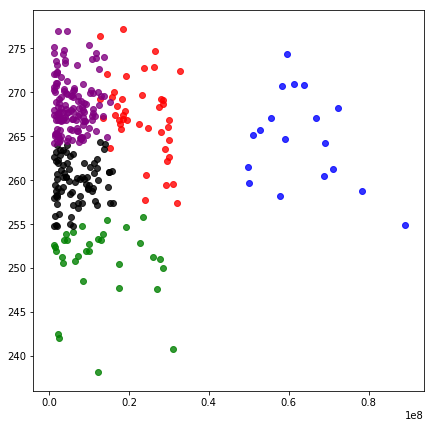

In [5]:
k=5
clust1, mean1, delta1 = k_means(5)

plt.figure(figsize=(7,7))
plt.scatter(clust1[0][:, 1], clust1[0][:, 2], color='red', alpha=0.8)
plt.scatter(clust1[1][:, 1], clust1[1][:, 2], color='blue', alpha=0.8)
plt.scatter(clust1[2][:, 1], clust1[2][:, 2], color='green', alpha=0.8)
plt.scatter(clust1[3][:, 1], clust1[3][:, 2], color='black', alpha=0.8)
plt.scatter(clust1[4][:, 1], clust1[4][:, 2], color='purple', alpha=0.8)
plt.show()

As we may see the largest cluster includes the elements which are located very closely to each other.

Cluster 1 is the closest to the grand mean. 

Cluster 2 describes the states with the highest revenue and the highest enrollment, while the marks are average.

Cluster 3 has following characteristics: the quantity of the students is relatively low, the revenue is low as well but the average reading score is comparatively low.

Cluster 4  includes the states which pupils quantity is average, the revenue is average as for all the states, but the marks are low.

Cluster 5 has pretty the same characteristic as the third one except for the marks which are high.

#### for k=9

Inertia: 3.15949619827
Grand mean:  [  9.48539843e+05   1.23748618e+07   2.63987000e+02]

Cluster: 1
Mean = [  2.79625919e+05   3.26865203e+06   2.65957900e+02]
Delta= [-70.5204 -73.5864   0.7466]
Num_elements= 62

Cluster: 2
Mean = [  2.63217250e+06   6.13867930e+07   2.67670000e+02]
Delta= [ 177.4973  396.0604    1.3951]
Num_elements= 6

Cluster: 3
Mean = [  6.00580241e+05   7.52478245e+06   2.59594800e+02]
Delta= [-36.6837 -39.193   -1.6638]
Num_elements= 58

Cluster: 4
Mean = [  1.72596543e+06   2.46842254e+07   2.67921800e+02]
Delta= [ 81.9602  99.4707   1.4905]
Num_elements= 28

Cluster: 5
Mean = [  4.31920857e+05   5.17946196e+06   2.51902200e+02]
Delta= [-54.4647 -58.1453  -4.5778]
Num_elements= 28

Cluster: 6
Mean = [  5.56939158e+06   6.38394296e+07   2.63119300e+02]
Delta= [  4.87154200e+02   4.15879900e+02  -3.28700000e-01]
Num_elements= 12

Cluster: 7
Mean = [  4.16907488e+05   4.83808795e+06   2.72308200e+02]
Delta= [-56.0474 -60.9039   3.1521]
Num_elements= 41

Cluster: 

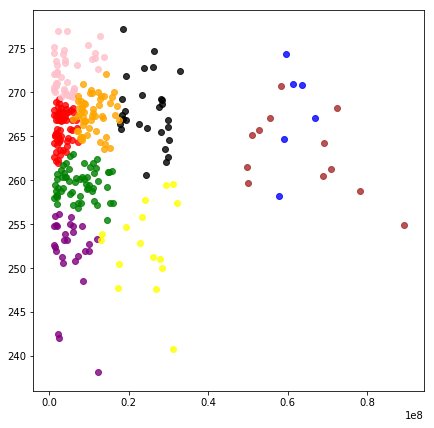

In [6]:
k=9 
clust2, mean2, delta2 = k_means(9)

plt.figure(figsize=(7,7))
plt.scatter(clust2[0][:, 1], clust2[0][:, 2], color='red', alpha=0.8)
plt.scatter(clust2[1][:, 1], clust2[1][:, 2], color='blue', alpha=0.8)
plt.scatter(clust2[2][:, 1], clust2[2][:, 2], color='green', alpha=0.8)
plt.scatter(clust2[3][:, 1], clust2[3][:, 2], color='black', alpha=0.8)
plt.scatter(clust2[4][:, 1], clust2[4][:, 2], color='purple', alpha=0.8)
plt.scatter(clust2[5][:, 1], clust2[5][:, 2], color='brown', alpha=0.8)
plt.scatter(clust2[6][:, 1], clust2[6][:, 2], color='pink', alpha=0.8)
plt.scatter(clust2[7][:, 1], clust2[7][:, 2], color='yellow', alpha=0.8)
plt.scatter(clust2[8][:, 1], clust2[8][:, 2], color='orange', alpha=0.8)
plt.show()

## 3.Bootstrap

Let's first of all take a look at our variable. I chose the average marks for reading as it is one of the characteristics of the academic performance and we want to know is there a significant difference between the years and the states.

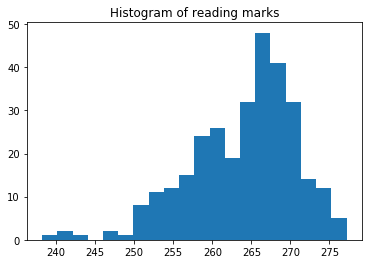

In [7]:
x = edu[:, 2]  # a variable
mean_x = np.mean(x)
std_x = np.std(x)
plt.hist(x, bins=20)
plt.title("Histogram of reading marks")
plt.show()

As we see the distribution of this variable is almost normal with mean around 265 and standard deviation near 6.

Firstly, we use bootstrap method for computing confidence interval. 

In [8]:
def compute_confidence(resampled_means, resampled_stds=None):
    
    # pivotal method:
    boots_mean = np.mean(resampled_means)
    if resampled_stds is None:
        boots_std = np.std(resampled_means)
    else:
        boots_std = np.std(resampled_stds)

    left_bound_pivot = boots_mean - 1.96*boots_std
    right_bound_pivot = boots_mean + 1.96*boots_std 

    # Non-pivotal:
    lower_bound_index = int((len(resampled_means))*.025)
    higher_bound_index = int((len(resampled_means))*.975)
    resampled_mean_sorted = sorted(resampled_means,)

    left_bound_nonpivot = resampled_mean_sorted[lower_bound_index]
    right_bound_nonpivot = resampled_mean_sorted[higher_bound_index]
    
    return boots_mean, boots_std, left_bound_pivot, right_bound_pivot, \
left_bound_nonpivot, right_bound_nonpivot

In [9]:
def bootstrap(x, n_resample, n_bootstrap):
    np.random.seed(42) 
    x_resampled_means, x_resampled_stds = [], []

    for _ in range(n_bootstrap):
        x_resampled = np.random.choice(x, size=n_resample, replace=True,)
        x_resampled_means.append(np.mean(x_resampled))
        x_resampled_stds.append(np.std(x_resampled))  

    boots_mean, boots_std, left_bound_pivot, right_bound_pivot, \
    left_bound_nonpivot, right_bound_nonpivot = compute_confidence(resampled_means=x_resampled_means, 
                                                                   resampled_stds=x_resampled_stds)

    return x_resampled_means, x_resampled_stds, boots_mean, boots_std, \
left_bound_pivot, right_bound_pivot, left_bound_nonpivot, right_bound_nonpivot

#### Finding of the confidence interval

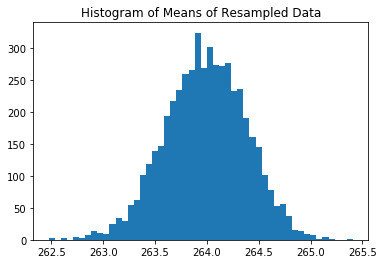

In [10]:
n_resample = 306
n_bootstrap = 5000

x_resampled_means, x_resampled_stds, x_boots_mean, \
x_boots_std, x_lbp, x_rbp, x_lbn, x_rbn = bootstrap(x=x, n_resample=n_resample, n_bootstrap=n_bootstrap)

plt.hist(x_resampled_means, bins=50)
plt.title("Histogram of Means of Resampled Data")
plt.show()

The distribution looks more like Gaussian and now we may compute the confidence interval using both pivotal and non-pivotal methods. 

In [11]:
print("Samples Mean          : %.4f" % mean_x, " Samples Std             : %.4f" % std_x)
print("Bootstrap Mean        : %.4f" % x_boots_mean, " Bootstrap Std           : %.4f" % x_boots_std)
print(" ")
print("Left Bound-Pivotal    : %.4f" % x_lbp, " Right Bound-Pivotal     : %.4f" % x_rbp)
print("Left Bound-Non Pivotal: %.4f" % x_lbn, " Right Bound-Non Pivotal : %.4f" % x_rbn)

Samples Mean          : 263.9870  Samples Std             : 6.7469
Bootstrap Mean        : 263.9856  Bootstrap Std           : 0.3226
 
Left Bound-Pivotal    : 263.3534  Right Bound-Pivotal     : 264.6178
Left Bound-Non Pivotal: 263.2047  Right Bound-Non Pivotal : 264.7239


Pivotal and non-pivotal methods show almost the same results, so there is no difference which method to use. 

As we may see, bootstrap decreased the standard deviation in data.

#### Comparing means of 2 clusters

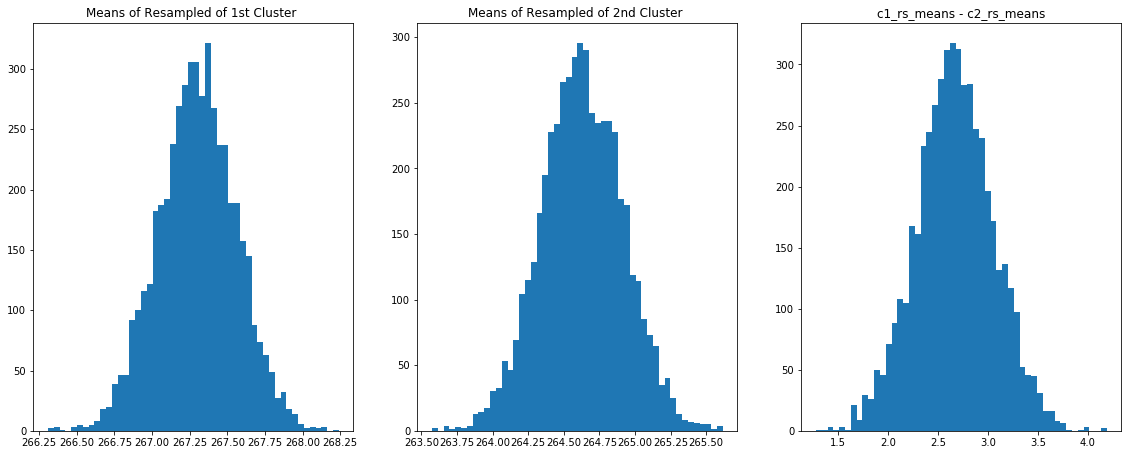

In [12]:
c1_resampled_means, c1_resampled_stds, c1_boots_mean, \
c1_boots_std, c1_left_bound_pivot, c1_right_bound_pivot, \
c1_left_bound_nonpivot, c1_right_bound_nonpivot = \
    bootstrap(x=clust1[0][:, 2], n_resample=n_resample, n_bootstrap=n_bootstrap)

c2_resampled_means, c2_resampled_stds, c2_boots_mean, \
c2_boots_std, c2_left_bound_pivot, c2_right_bound_pivot, \
c2_left_bound_nonpivot, c2_right_bound_nonpivot = \
    bootstrap(x=clust1[1][:, 2], n_resample=n_resample, n_bootstrap=n_bootstrap)


d12 = np.subtract(np.asarray(c1_resampled_means), np.asarray(c2_resampled_means))  
fig = plt.figure(figsize=(19.5, 7.5))

ax = fig.add_subplot(131)
plt.hist(c1_resampled_means, bins=50)
plt.title("Means of Resampled of 1st Cluster ")

ax = fig.add_subplot(132)
plt.hist(c2_resampled_means, bins=50)
plt.title("Means of Resampled of 2nd Cluster ")

ax = fig.add_subplot(133)
plt.hist(d12, bins=50)
plt.title("c1_rs_means - c2_rs_means")
plt.show()

In [13]:
print("Cluster 1")
print("Samples Mean          : %.4f" % mean1[0][2])
print("Bootstrap Mean        : %.4f" % c1_boots_mean)
print(" ")
print("Left Bound-Pivotal    : %.4f" % c1_left_bound_pivot, 
      " Right Bound-Pivotal     : %.4f" % c1_right_bound_pivot)
print("Left Bound-Non Pivotal: %.4f" % c1_left_bound_nonpivot, 
      " Right Bound-Non Pivotal : %.4f" % c1_right_bound_nonpivot)
print(" ")
print("Cluster 2")
print("Samples Mean          : %.4f" % mean1[1][2])
print("Bootstrap Mean        : %.4f" % c2_boots_mean)
print(" ")
print("Left Bound-Pivotal    : %.4f" % c2_left_bound_pivot, 
      " Right Bound-Pivotal     : %.4f" % c2_right_bound_pivot)
print("Left Bound-Non Pivotal: %.4f" % c2_left_bound_nonpivot, 
      " Right Bound-Non Pivotal : %.4f" % c2_right_bound_nonpivot)

Cluster 1
Samples Mean          : 267.2935
Bootstrap Mean        : 267.2993
 
Left Bound-Pivotal    : 266.9415  Right Bound-Pivotal     : 267.6570
Left Bound-Non Pivotal: 266.7837  Right Bound-Non Pivotal : 267.8021
 
Cluster 2
Samples Mean          : 264.6362
Bootstrap Mean        : 264.6307
 
Left Bound-Pivotal    : 264.3264  Right Bound-Pivotal     : 264.9351
Left Bound-Non Pivotal: 264.0678  Right Bound-Non Pivotal : 265.1964


The difference between the schools of the 1st cluster and the 2nd cluster is quite significant in average.

#### Comparing mean with grand mean

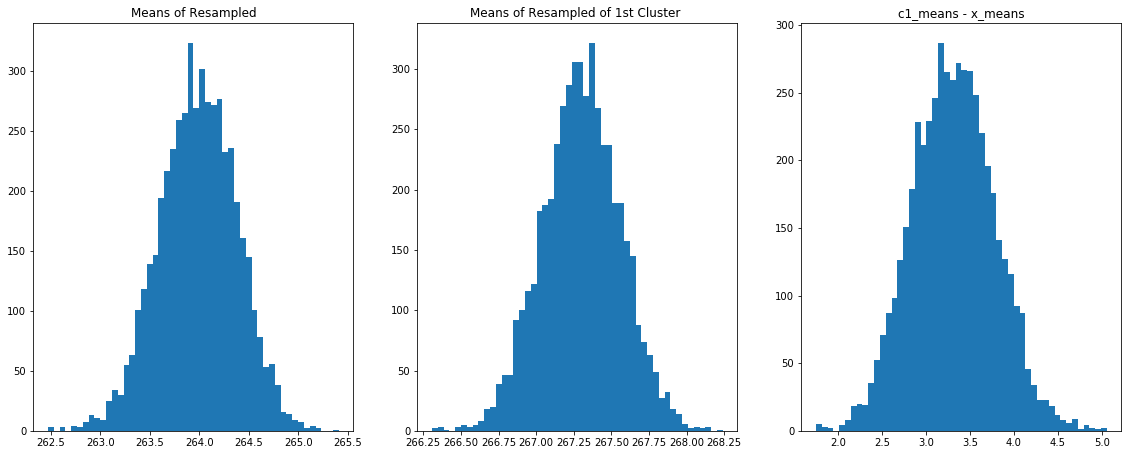

In [14]:
d1x = np.subtract(np.asarray(c1_resampled_means), \
                  np.asarray(x_resampled_means))  
fig = plt.figure(figsize=(19.5, 7.5))

ax = fig.add_subplot(131)
plt.hist(x_resampled_means, bins=50)
plt.title("Means of Resampled")

ax = fig.add_subplot(132)
plt.hist(c1_resampled_means, bins=50)
plt.title("Means of Resampled of 1st Cluster ")

ax = fig.add_subplot(133)
plt.hist(d1x, bins=50)
plt.title("c1_means - x_means")
plt.show()

In [15]:
print("Cluster 1")
print("Samples Mean          : %.4f" % mean1[0][2])
print("Bootstrap Mean        : %.4f" % c1_boots_mean)
print(" ")
print("Left Bound-Pivotal    : %.4f" % c1_left_bound_pivot, 
      " Right Bound-Pivotal     : %.4f" % c1_right_bound_pivot)
print("Left Bound-Non Pivotal: %.4f" % c1_left_bound_nonpivot, 
      " Right Bound-Non Pivotal : %.4f" % c1_right_bound_nonpivot)
print(" ")
print("General")
print("Samples Mean          : %.4f" % mean_x)
print("Bootstrap Mean        : %.4f" % x_boots_mean)
print(" ")
print("Left Bound-Pivotal    : %.4f" % x_lbp, 
      " Right Bound-Pivotal     : %.4f" % x_rbp)
print("Left Bound-Non Pivotal: %.4f" % x_lbn, 
      " Right Bound-Non Pivotal : %.4f" % x_rbn)

Cluster 1
Samples Mean          : 267.2935
Bootstrap Mean        : 267.2993
 
Left Bound-Pivotal    : 266.9415  Right Bound-Pivotal     : 267.6570
Left Bound-Non Pivotal: 266.7837  Right Bound-Non Pivotal : 267.8021
 
General
Samples Mean          : 263.9870
Bootstrap Mean        : 263.9856
 
Left Bound-Pivotal    : 263.3534  Right Bound-Pivotal     : 264.6178
Left Bound-Non Pivotal: 263.2047  Right Bound-Non Pivotal : 264.7239


As we may notice, the mean of the average reading mark is lower than in general that may point at the low academic performance in general of the states that are included in this cluster.

## 4.Contingency tables

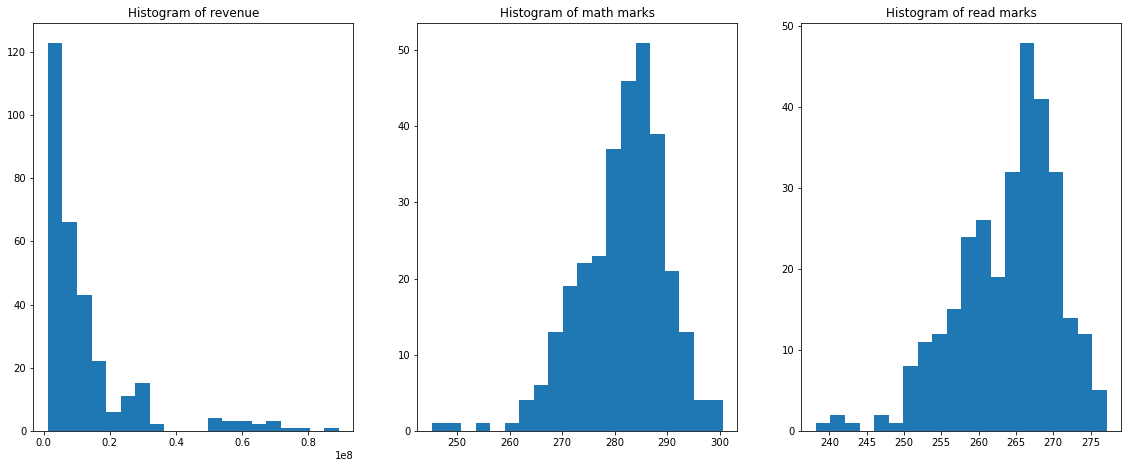

In [47]:
rev=pd.read_csv('ed.csv', delimiter = ";", 
                index_col= 'key', usecols=['key','revenue']).values
math=pd.read_csv('ed.csv', delimiter = ";", 
                 index_col= 'key', usecols=['key','math_8']).values
read=pd.read_csv('ed.csv', delimiter = ";", 
                 index_col= 'key', usecols=['key','read_8']).values
fig = plt.figure(figsize=(19.5, 7.5))

ax = fig.add_subplot(131)
plt.hist(rev, bins=20)
plt.title("Histogram of revenue")

ax = fig.add_subplot(132)
plt.hist(math, bins=20)
plt.title("Histogram of math marks")

ax = fig.add_subplot(133)
plt.hist(read, bins=20)
plt.title("Histogram of read marks")
plt.show()

As far as there is no nominal data in the chosen dataset, I took three numerical variables which represent marks for reading anad math and also revenue values.
From the histogram it is clear that it is hard to find the exact boundaries for the bins as there are just few minimal points, so we assume they will be as follows: 

In [17]:
read_bins= [[0,260],[260,265],[265,270],[270,290]]
math_bins = [[0,275],[275,285],[285,290],[290,350]]
rev_bins = [[0,5000000],[5000000,10000000],\
            [10000000,20000000],[20000000,100000000]]

read_lens = []
for i1, bin1 in enumerate(read_bins):
    read_lens.append(np.sum(np.logical_and(bin1[0]<=read,read<bin1[1])))
math_lens = []
for i1, bin1 in enumerate(math_bins):
    math_lens.append(np.sum(np.logical_and(bin1[0]<=math,math<bin1[1])))
rev_lens = []
for i1, bin1 in enumerate(rev_bins):
    rev_lens.append(np.sum(np.logical_and(bin1[0]<=rev,rev<bin1[1])))

print("Bins length (1st feature):", read_lens)
print("Bins length (2nd feature):", math_lens)
print("Bins length (3rd feature):", rev_lens)

Bins length (1st feature): [80, 67, 110, 49]
Bins length (2nd feature): [61, 129, 80, 36]
Bins length (3rd feature): [114, 73, 71, 48]


In [18]:
def visualize_matrix(mat, text, ylabel, xlabel):
    fig, ax = plt.subplots()
    plt.title(text)
    ax.matshow(mat, cmap=plt.cm.Blues)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    ax.xaxis.set_ticks_position('bottom')

    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            c = mat[i,j]
            ax.text(j, i, "{0:5.3f}".format(c), va='center', ha='center')
    plt.show()

Let's firstly compute contingency tables.

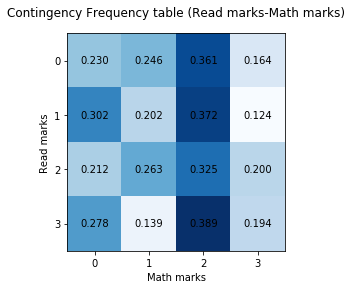

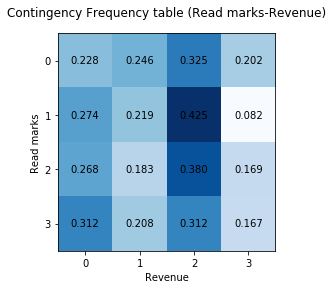

In [19]:
rel_freq_12 =np.zeros((4,4))
cond_freq_12 = np.zeros((4,4))
for i1, bin1 in enumerate(read_bins):
    for i2, bin2 in enumerate(math_bins):
        rel_freq_12[i2,i1] = np.sum(np.logical_and\
                                    (np.logical_and(bin1[0]<=read,read<bin1[1]),
                                  np.logical_and\
                                     (bin2[0]<=math,math<bin2[1])))/n
        cond_freq_12[i2,i1] = np.sum(np.logical_and\
                                     (np.logical_and(bin1[0]<=read,read<bin1[1]),\
                                  np.logical_and(bin2[0]<=math,math<bin2[1])))/math_lens[i2]
read_probs = np.sum(rel_freq_12, axis=0)
math_probs = np.sum(rel_freq_12, axis=1)
visualize_matrix(cond_freq_12, "Contingency Frequency table (Read marks-Math marks)", 
                 "Read marks", "Math marks")
        
rel_freq_13 =np.zeros((4,4))
cond_freq_13 = np.zeros((4,4))
for i1, bin1 in enumerate(read_bins):
    for i3, bin3 in enumerate(rev_bins):
        rel_freq_13[i3,i1] = np.sum(np.logical_and(np.logical_and(bin1[0]<=read,read<bin1[1]),
                                  np.logical_and(bin3[0]<=rev, rev<bin3[1])))/n
        cond_freq_13[i3,i1] = np.sum(np.logical_and(np.logical_and(bin1[0]<=read,read<bin1[1]),
                                  np.logical_and(bin3[0]<=rev, rev<bin3[1])))/rev_lens[i3]
read_probs = np.sum(rel_freq_13, axis=0)
rev_probs = np.sum(rel_freq_13, axis=1)
visualize_matrix(cond_freq_13, "Contingency Frequency table (Read marks-Revenue)", 
                 "Read marks", "Revenue")

In the first table we see that the highest amount of elements stays for the intercept of the highest marks for reading and pretty good marks for math. Very few states have both good results in reading and math at the same time. 

The second table has the maximum amount of elements in the intercept of the pretty low average mark and quite average revenue. 

Then, let's calculate Quetelet relative index tables.

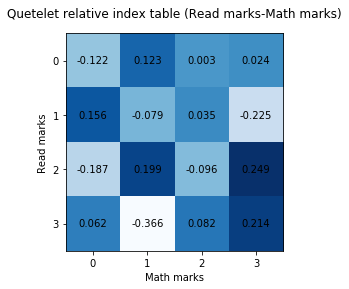

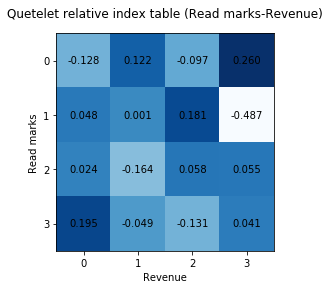

In [20]:
contingency_table_12_quetelet = np.zeros((4, 4))
contingency_table_13_quetelet = np.zeros((4, 4))
for j2 in range(rel_freq_12.shape[0]):
    for j1 in range(rel_freq_12.shape[1]):
        contingency_table_12_quetelet[j2, j1] = \
        rel_freq_12[j2, j1]/(read_probs[j1]*math_probs[j2])-1

for j3 in range(rel_freq_13.shape[0]):
    for j1 in range(rel_freq_13.shape[1]):
        contingency_table_13_quetelet[j3, j1] = \
        rel_freq_13[j3, j1]/(read_probs[j1]*rev_probs[j3])-1
        
visualize_matrix(contingency_table_12_quetelet, 
                 "Quetelet relative index table (Read marks-Math marks)", 
                 "Read marks", "Math marks")
visualize_matrix(contingency_table_13_quetelet, 
                 "Quetelet relative index table (Read marks-Revenue)", 
                 "Read marks", "Revenue")

Knowing that we have good marks for reading increases the probability of the having good marks for math in 24,9% and excellent - in 21,4%. 

As for revenue, the bad marks adds 26% to having the high revenue which sounds contraversial with logic. And vice versa, excellent marks increases the chance of low revenue.
The last result seems to be interesting for further exploration because it is quite different from the things we may have assumed.

And finally, let's show the results of computing the chi-square summary Quetelet index over both tables.

Index 1: 0.0212
Index 2: 0.0245


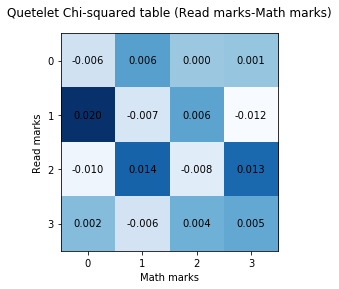

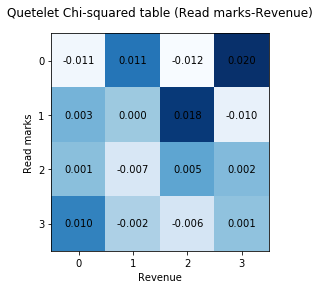

In [21]:
chi_sq_quet_12 = contingency_table_12_quetelet*rel_freq_12
chi_sq_quet_index_12 = np.sum(chi_sq_quet_12)
print("Index 1:", np.around(chi_sq_quet_index_12, decimals = 4))

chi_sq_quet_13 = contingency_table_13_quetelet*rel_freq_13
chi_sq_quet_index_13 = np.sum(chi_sq_quet_13)
print("Index 2:", np.around(chi_sq_quet_index_13, decimals = 4))

visualize_matrix(chi_sq_quet_12, "Quetelet Chi-squared table (Read marks-Math marks)", 
                 "Read marks", "Math marks")
visualize_matrix(chi_sq_quet_13, "Quetelet Chi-squared table (Read marks-Revenue)", 
                 "Read marks", "Revenue")

These values represent the average growth in 2% of probability of meeting very bad math marks if the result for reading test will be bad. 

In the second table we see that with average reading mark growing revenue decreases. So if we know that the read marks are bad then the probability of meeting high revenue increases on 1,8%.

##### Tell what numbers of observations would suffice to see the features as associated at 95% confidence level; at 99 % confidence
The number of degrees of freedom for G&T contingency table is df=(4-1)×(4-1)=9. According to the table values of chi-squared test, at the 95% probability that chi squared is less than t value, t=16.919, and t=21.666 for the 99% probability. 

Obviously, any N>16.919/0.0245=690.57, that is, at any N >691 the hypothesis of statistical independence should be rejected at 95% confidence level. The number N should be raised to N >21.666 /0.0245=884,32, that is, 885 or more, to reject the
hypothesis at 99% confidence level.
If N is smaller than the values mentioned before, then the hypothesis should be accepted.


## 5.PCA-SVD 

In [22]:
import numpy.linalg as linalg

For this task was used the same dataset as for the k-means clustering. 

Firstly, let's define data scatter.

In [23]:
ma = np.max(edu, axis=0)   
mi = np.min(edu, axis=0)
data_norm1 = np.divide(np.subtract(edu, mi), np.subtract(ma, mi))
data_scatter = np.sum(np.power(data_norm1, 2))
print("Data scatter: ", data_scatter)

Data scatter:  173.437632602


#### SVD
As for SVD we use the inbuilt function of in the library 'linalg'. 

Z and C are the quadratic matrices that we get from the standard value decomposition. 
Sigma stands for the eigenvalues.

At these steps we try to find the main information excluding other which is extra.

In [24]:
z, sigma, c = linalg.svd(data_norm1)
print(z)
print("z shape:", z.shape, "sigma shape:", sigma.shape, "c shape:", c.shape)

[[-0.0408775  -0.00480967 -0.02833151 ..., -0.00909445 -0.03179597
  -0.00140181]
 [-0.05821811 -0.04816774  0.00755385 ..., -0.00977287  0.0029354
  -0.00124683]
 [-0.06838658 -0.02188505 -0.04133596 ..., -0.05216913 -0.04966769
  -0.08986224]
 ..., 
 [-0.04469279 -0.02967375 -0.0038764  ...,  0.99733455 -0.00263121
  -0.00439359]
 [-0.05812638 -0.00895121  0.00471838 ..., -0.00261168  0.99674506
  -0.00417608]
 [-0.06743269 -0.05821206  0.01080306 ..., -0.00437338 -0.0042042
   0.99237156]]
z shape: (306, 306) sigma shape: (3,) c shape: (3, 3)


In [25]:
zc = z[:3, :3] 
print("z correct: \n", zc)
print("c: \n", c)

z correct: 
 [[-0.0408775  -0.00480967 -0.02833151]
 [-0.05821811 -0.04816774  0.00755385]
 [-0.06838658 -0.02188505 -0.04133596]]
c: 
 [[-0.22200472 -0.19407343 -0.95553619]
 [ 0.69975449  0.65074429 -0.29474653]
 [-0.67901219  0.73407586  0.00866455]]


In [26]:
np.divide((np.power(sigma, 2))*100, data_scatter)

array([ 89.31418959,  10.33651073,   0.34929968])

In [27]:
c0 = c[:, 0]
c0

array([-0.22200472,  0.69975449, -0.67901219])

In [28]:
z0 = -z[:, 0]
z0

array([ 0.0408775 ,  0.05821811,  0.06838658,  0.04174748,  0.07557529,
        0.04681791,  0.04413937,  0.03325108,  0.06386608,  0.08377422,
        0.0620696 ,  0.00819415,  0.06802294,  0.05795495,  0.05231351,
        0.03953463,  0.06072368,  0.05688151,  0.05522212,  0.05254498,
        0.06185528,  0.06536093,  0.03974345,  0.06624704,  0.06688254,
        0.07717516,  0.05349224,  0.0640983 ,  0.0323985 ,  0.05695089,
        0.07660898,  0.05932971,  0.05697511,  0.07308472,  0.07297458,
        0.04335927,  0.05671867,  0.05103279,  0.06956022,  0.05967287,
        0.04624238,  0.05148008,  0.06221391,  0.07554525,  0.04547914,
        0.06072399,  0.04721555,  0.05049983,  0.05795321,  0.07438328,
        0.0574352 ,  0.0716698 ,  0.05691192,  0.05643666,  0.03500716,
        0.08094217,  0.05878617,  0.03006402,  0.04071997,  0.032668  ,
        0.04997234,  0.03165356,  0.05291279,  0.05159173,  0.0656788 ,
        0.00474739,  0.0658013 ,  0.0366532 ,  0.03965048,  0.02

In [29]:
z_min = np.min(z0)
z_max = np.max(z0)
print("z min:", np.around(z_min, decimals = 4), 
      ", z max:", np.around(z_max,decimals = 4))

z min: 0.0047 , z max: 0.0894


The z0c array includes ranged elements of the initial z array in percents.

In [30]:
z0c = 100*(z0-z_min)/(z_max-z_min)
z0c

array([  42.66533566,   63.14252423,   75.15027159,   43.69268478,
         83.63928447,   49.68025706,   46.51721754,   33.65945528,
         69.8121078 ,   93.32124024,   67.69067311,    4.07020935,
         74.72086584,   62.83177079,   56.16990167,   41.07957161,
         66.1013014 ,   61.56416377,   59.60462529,   56.44324293,
         67.43758558,   71.57734075,   41.32616203,   72.62373183,
         73.37418326,   85.52853924,   57.56184501,   70.08633356,
         32.65265569,   61.64608851,   84.85994352,   64.45519277,
         61.67469451,   80.69821793,   80.56815209,   45.59601767,
         61.37186671,   54.657518  ,   76.53620552,   64.86042953,
         49.00062131,   55.18571411,   67.86109046,   83.60380405,
         48.09932954,   66.1016689 ,   50.14982444,   54.02816116,
         62.8297128 ,   82.23165987,   62.21800964,   79.02736321,
         61.60007534,   61.03884938,   35.73316767,   89.97692054,
         63.81333396,   29.89591622,   42.47931491,   32.97090

#### Data vizualisation

Let's show what we get from the decomposition. 

In [31]:
data_norm_z = np.divide(np.subtract(edu, mean), std) 

In [32]:
data_norm[89:93, :]

array([[ 0.11261411,  0.17634445, -0.33224544],
       [-0.13120264, -0.11561582,  0.02953596],
       [-0.03765495, -0.05100508, -0.1494506 ],
       [-0.13276742, -0.12595941,  0.16047775]])

In [33]:
data_norm_z[89:93, :]

array([[ 0.6185019 ,  1.03495444, -1.91993515],
       [-0.72059427, -0.67854197,  0.17067843],
       [-0.20680941, -0.29934562, -0.86362496],
       [-0.72918838, -0.73924784,  0.9273472 ]])

In [34]:
z_z, sigma_z, c_z = linalg.svd(data_norm_z)  # compute svd with z-scoring
z_r, sigma_r, c_r = linalg.svd(data_norm) # compute svd for data with rang-normalization
print(" sigma_z:", sigma_z)
print(" sigma_r:", sigma_r)

 sigma_z: [ 24.35937851  17.47061376   4.40435391]
 sigma_r: [ 4.29546801  3.0233062   0.77486981]


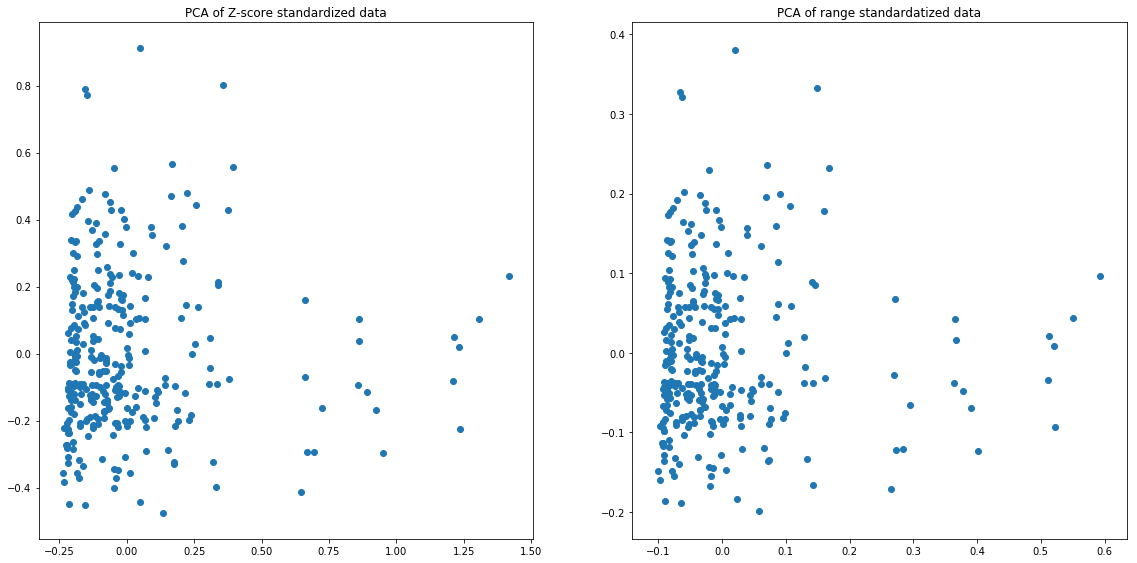

In [35]:
z_z0 = z_z[:, 0]*np.sqrt(sigma_z[0])
z_z1 = z_z[:, 1]*np.sqrt(sigma_z[1])

z_r0 = z_r[:, 0]*np.sqrt(sigma_r[0])
z_r1 = z_r[:, 1]*np.sqrt(sigma_r[1])

fig = plt.figure(figsize=(19.5, 9.5))

ax = fig.add_subplot(121)
plt.scatter(z_z0, z_z1)
plt.title("PCA of Z-score standardized data")

ax = fig.add_subplot(122)
plt.scatter(z_r0, z_r1)
plt.title("PCA of range standardatized data")
plt.show()

As we see from these plots, there is the difference only in scaling.

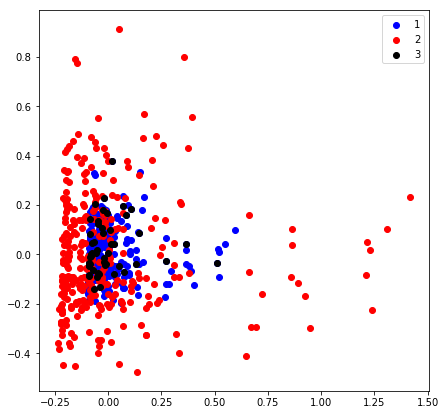

In [36]:
fig = plt.figure(figsize=(7, 7)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(z_r0, z_r1, c='b')
ax = fig.add_subplot(1, 1, 1)
ax.scatter(z_z0, z_z1, c='r')
ax.scatter(z_r0[50: 100], z_r1[50:100], c='k')
plt.legend("1" + "2" + "3")
plt.show()

## 6.Correlation

Excluding the values that has linear dependency (general quantity of the pupils comparing with the amount of the pupils in the 8th form) there was find the "linear-like" relation between enroll and revenue. That is why I took these two columns.

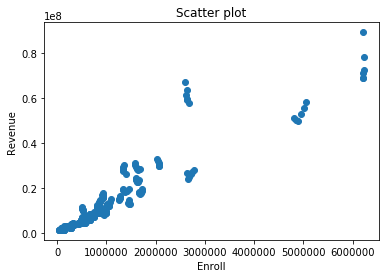

In [39]:
educ=pd.read_csv('ed.csv', delimiter = ";", index_col="key",
                usecols=['key','enroll','revenue']).values

plt.scatter(educ[:,0],educ[:,1])
plt.title('Scatter plot')
plt.xlabel('Enroll')
plt.ylabel('Revenue')
plt.show()

Correlation matrix: 
 [[ 1.         0.9363938]
 [ 0.9363938  1.       ]]

Coefficient:  [ 12.46384181] 
Intercept:  552411.228005


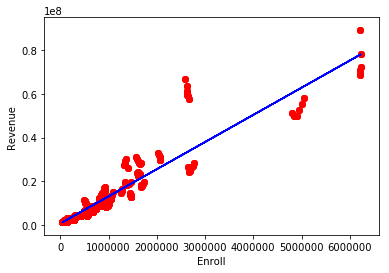

In [43]:
from sklearn.linear_model import LinearRegression
corr = np.corrcoef(educ[:,0],educ[:,1])
print("Correlation matrix: \n", corr)
print("")

x_e = np.array([educ[:,0]])
y_r = np.array(educ[:,1])
regr = LinearRegression()
reg = regr.fit(np.transpose(x_e), np.transpose(y_r))
print("Coefficient: ", reg.coef_, "\nIntercept: ", reg.intercept_)

plt.scatter(x_e, y_r, color='red')
plt.plot(x_e.transpose(), reg.predict(x_e.transpose()), color='blue')
plt.ylabel("Revenue")
plt.xlabel("Enroll")
plt.show()

The correlation matrix approved our assumption that the dependency between these two variables is quite strong.

From the plot we may tell that despite the general dependency is linear-like there are some perturbations with increasing of the enrollment which may affect the reliability of the regression function. 

The slope means that there is positive dependency: with increasing of enroll the revenue grows as well. 
Intercept means that if there will be no students at school the revenue will be $552 thousands. 
The coefficient means that with increasing on one point there will be increasing in 12.46 dollars of revenue.

In [45]:
determinancy = np.around(corr**2, decimals = 4)
print("Determinancy: \n", determinancy)
pred = 12.46*x_e + 552411.22
residuals = abs(y_r - pred)
mean_resid = np.sum(residuals)/306
print("Mean relative absolute error: ", mean_resid)

Determinancy: 
 [[ 1.      0.8768]
 [ 0.8768  1.    ]]
Mean relative absolute error:  2765245.85608


The determinancy coefficient shows that the model quite well explains dependancy between these two variables as it is close to the 1. So the prediction which is built on these model would be quite reliable.
The mean absolute error seams to be big, but let's keep in mind that ourvalues are quite large, so for this data the error is not such big.